In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install yfinance
!{sys.executable} -m pip install fredapi

In [93]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
import seaborn as sns; sns.set()
import statsmodels as sm

from fredapi import Fred

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [15]:
stock = ['^GSPC','AAPL','MSFT','INTC','IBM']
start = datetime.datetime(2020,12,31)
end = datetime.datetime(2021,4,2)
SP = yf.download(stock,start=start,end = end, interval='1d')
SP_close=SP['Close']
SP

[*********************100%***********************]  5 of 5 completed


Adj Close                                                  \
                  AAPL         IBM       INTC        MSFT        ^GSPC   
Date                                                                     
2020-12-31  131.877014  114.579292  48.560837  220.974640  3756.070068   
2021-01-04  128.617111  112.813454  48.414623  216.275375  3700.649902   
2021-01-05  130.207306  114.815964  49.330868  216.484009  3726.860107   
2021-01-06  125.824326  117.683174  49.808479  210.870728  3748.139893   
2021-01-07  130.117844  117.410103  50.870930  216.871475  3803.790039   
...                ...         ...        ...         ...          ...   
2021-03-26  120.647362  125.795486  63.614262  235.484375  3974.540039   
2021-03-29  120.826523  125.315857  63.251423  234.249619  3971.090088   
2021-03-30  119.343437  124.264320  62.535553  230.873886  3958.550049   
2021-03-31  121.582993  122.917641  62.761101  234.777374  3972.889893   
2021-04-01  122.429047  122.889954  63.300461  241.329681  4019.870117   

                 Close                                                  ...  \
                  AAPL         IBM       INTC        MSFT        ^GSPC  ...   
Date                                                                    ...   
2020-12-31  132.690002  120.344170  49.820000  222.419998  3756.070068  ...   
2021-01-04  129.410004  118.489487  49.669998  217.690002  3700.649902  ...   
2021-01-05  131.009995  120.592735  50.610001  217.899994  3726.860107  ...   
2021-01-06  126.599998  123.604210  51.099998  212.250000  3748.139893  ...   
2021-01-07  130.919998  123.317398  52.189999  218.289993  3803.790039  ...   
...                ...         ...        ...         ...          ...  ...   
2021-03-26  121.209999  130.382416  64.870003  236.479996  3974.540039  ...   
2021-03-29  121.389999  129.885284  64.500000  235.240005  3971.090088  ...   
2021-03-30  119.900002  128.795410  63.770000  231.850006  3958.550049  ...   
2021-03-31  122.150002  127.399620  64.000000  235.770004  3972.889893  ...   
2021-04-01  123.000000  127.370934  64.550003  242.350006  4019.870117  ...   

                  Open                                                  \
                  AAPL         IBM       INTC        MSFT        ^GSPC   
Date                                                                     
2020-12-31  134.080002  118.757172  48.750000  221.699997  3733.270020   
2021-01-04  133.520004  120.315491  49.889999  222.529999  3764.610107   
2021-01-05  128.889999  119.512428  49.450001  217.259995  3698.020020   
2021-01-06  127.720001  121.319313  50.439999  212.169998  3712.199951   
2021-01-07  128.360001  124.321220  51.490002  214.039993  3764.709961   
...                ...         ...        ...         ...          ...   
2021-03-26  120.349998  127.428299  61.799999  231.550003  3917.120117   
2021-03-29  121.650002  130.000000  64.010002  236.589996  3969.310059   
2021-03-30  120.110001  129.885284  63.770000  233.529999  3963.340088   
2021-03-31  121.650002  128.623322  64.010002  232.910004  3967.250000   
2021-04-01  123.660004  127.877632  64.720001  238.470001  3992.780029   

               Volume                                           
                 AAPL      IBM      INTC      MSFT       ^GSPC  
Date                                                            
2020-12-31   99116600  3738822  28576800  20942100  3172510000  
2021-01-04  143301900  5417443  46102500  37130100  5006680000  
2021-01-05   97664900  6395872  24866600  23823000  4582620000  
2021-01-06  155088000  8322708  36809600  35930700  6049970000  
2021-01-07  109578200  4714740  32092300  27694500  5080870000  
...               ...      ...       ...       ...         ...  
2021-03-26   94071200  5823710  34705800  25479900  5467850000  
2021-03-29   80819200  4835344  26161600  25227500  4619840000  
2021-03-30   85671900  5010758  20709500  24792000  4103570000  
2021-03-31  118323800  5172575  33013200  43623500  

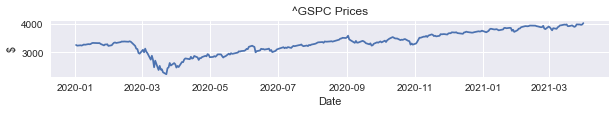

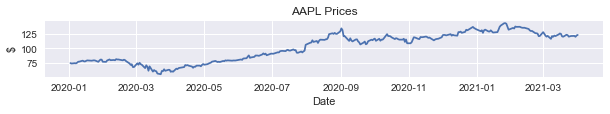

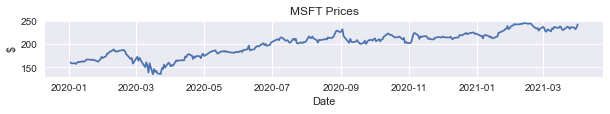

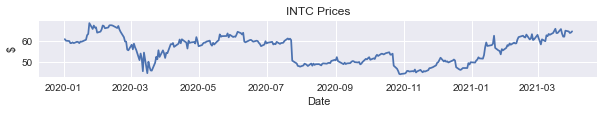

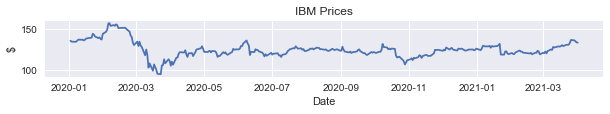

In [30]:
start=1
for i in stock:
    plt.figure(figsize=(10,6))
    plt.subplot(5,1,start)
    plt.plot(SP_close.loc[:,i])
    plt.title(i+' Prices')
    plt.ylabel('$')
    plt.xlabel('Date')
    start=start+1
plt.show()

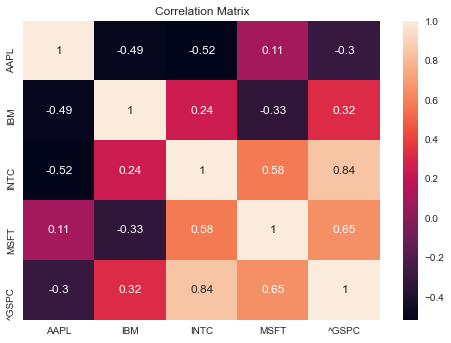

In [18]:
heat_corr = SP_close.corr()
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [48]:
InitPrice = SP_close.iloc[1]
FinPrice = SP_close.iloc[-1]


Returns = (FinPrice - InitPrice)/InitPrice
print(Returns)

(63, 5)
AAPL    -0.049533
IBM      0.074956
INTC     0.299577
MSFT     0.113280
^GSPC    0.086261
dtype: float64


In [44]:
fred = Fred(api_key='1495abd46f514fa909a930eea724eb13')
interest=fred.get_series('DGS3MO')

In [ ]:
plt.plot(risk_free_rate)
plt.title('3-Month Treasury Constant Maturity Rate')
plt.ylabel('%')
plt.xlabel('Date')
plt.show()

In [72]:
risk_free_rate = interest['2020-12-31':'2021-04-02']
avg_return = risk_free_rate.mean(skipna=True)

In [74]:
excess_return = Returns - avg_return
print(excess_return)

AAPL    -0.100314
IBM      0.024174
INTC     0.248796
MSFT     0.062499
^GSPC    0.035479
dtype: float64


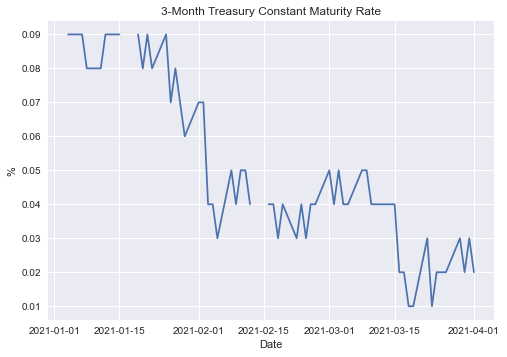

In [87]:
"""Answers from manning"""
returns = SP_close.pct_change()
returns.dropna(inplace=True)
returns.head()
print(returns)

                AAPL       IBM      INTC      MSFT     ^GSPC
Date                                                        
2021-01-04 -0.024719 -0.015411 -0.003011 -0.021266 -0.014755
2021-01-05  0.012364  0.017751  0.018925  0.000965  0.007083
2021-01-06 -0.033662  0.024972  0.009682 -0.025929  0.005710
2021-01-07  0.034123 -0.002320  0.021331  0.028457  0.014847
2021-01-08  0.008631 -0.003566 -0.010347  0.006093  0.005492
...              ...       ...       ...       ...       ...
2021-03-26  0.005141  0.024874  0.045953  0.017819  0.016631
2021-03-29  0.001485 -0.003813 -0.005704 -0.005244 -0.000868
2021-03-30 -0.012274 -0.008391 -0.011318 -0.014411 -0.003158
2021-03-31  0.018766 -0.010837  0.003607  0.016907  0.003622
2021-04-01  0.006959 -0.000225  0.008594  0.027909  0.011825

[62 rows x 5 columns]


In [174]:
rf = risk_free_rate / 90
rf = rf.dropna().iloc[:-1]

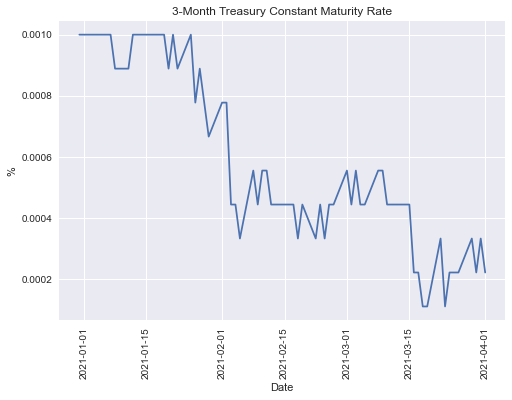

In [79]:
plt.plot(rf)
plt.xlabel('Date')
plt.ylabel('%')
plt.title('3-Month Treasury Constant Maturity Rate')
plt.xticks(rotation=90)
plt.show()

In [90]:
"""Excess returns on a daily basis"""
stocks = ["AAPL", "IBM", "MSFT", "INTC", "^GSPC"]
for i in stocks:
    returns["excess_return_"+str(i)]=returns[i] - rf

In [91]:
returns.head()

,AAPL,IBM,INTC,MSFT,^GSPC,excess_return_AAPL,excess_return_IBM,excess_return_MSFT,excess_return_INTC,excess_return_^GSPC
Date,,,,,,,,,,
2021-01-04,-0.024719,-0.015411,-0.003011,-0.021266,-0.014755,-0.025719,-0.016411,-0.022266,-0.004011,-0.015755
2021-01-05,0.012364,0.017751,0.018925,0.000965,0.007083,0.011364,0.016751,-0.000035,0.017925,0.006083
2021-01-06,-0.033662,0.024972,0.009682,-0.025929,0.005710,-0.034662,0.023972,-0.026929,0.008682,0.004710
2021-01-07,0.034123,-0.002320,0.021331,0.028457,0.014847,0.033123,-0.003320,0.027457,0.020331,0.013847
2021-01-08,0.008631,-0.003566,-0.010347,0.006093,0.005492,0.007742,-0.004455,0.005204,-0.011236,0.004603


In [104]:
"""Regress each stock against SPY to get the betas"""
import numpy as np
import statsmodels.api as sm
mod = sm.OLS(spector_data.endog, spector_data.exog)
res = mod.fit()
print(res.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.505
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              9.852
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                    0.000121
Time:                        23:27:49   Log-Likelihood:                         -17.077
No. Observations:                  32   AIC:                                      40.15
Df Residuals:                      29   BIC:                                      44.55
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [138]:
X = returns['excess_return_^GSPC']
AAPL = returns["excess_return_AAPL"]

In [140]:
mod = sm.OLS(AAPL, X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     excess_return_AAPL   R-squared (uncentered):                   0.432
Model:                            OLS   Adj. R-squared (uncentered):              0.422
Method:                 Least Squares   F-statistic:                              46.32
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                    4.99e-09
Time:                        23:40:24   Log-Likelihood:                          170.22
No. Observations:                  62   AIC:                                     -338.4
Df Residuals:                      61   BIC:                                     -336.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_^GSPC     1.3623      0.200      6.806      0.000       0.962       1.763
==============================================================================
Omnibus:                        2.676   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                2.073
Skew:                          -0.145   Prob(JB):                        0.355
Kurtosis:                       3.848   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
stockies = stocks[0:4]
Re = []
Realized = []
betas = []
for i in stockies:
    gainz = returns[i]
    inputs = sm.add_constant(X, prepend=False)
    mod = sm.OLS(gainz,inputs)
    res = mod.fit()
    betas.append(res.params[0])
    beta = res.params[0]
    er = beta*spy + rf
    Re.append(er.mean(skipna=True))
    Realized.append(gainz.mean(skipna=True))

In [198]:
print(Re)
print(Realized)


[0.0021383535703045995, 0.0010943995030744853, 0.0018073297272309735, 0.0025122382137191452]
[-0.001010821570646928, 0.0010851553444961724, 0.0015127127697716642, 0.004567429548707527]


In [213]:
value = []
for i in range(len(Re)):
    value.append( Realized[i] - Re[i])

In [216]:
print(value)

[-0.0031491751409515275, -9.244158578312857e-06, -0.00029461695745930925, 0.0020551913349883817]


In [220]:
betas

[1.3764152793666633,
 0.46445324891972084,
 1.0872443421273035,
 1.703027923796452]

In [235]:
b2 = []
for i in betas:
    b2.append(float(i)) 
    
Re2 = []
for i in Realized:
    Re2.append(float(i))

In [248]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from fredapi import Fred

In [247]:
""" Arbitrage Pricing Theory section"""
fred = Fred(api_key='1495abd46f514fa909a930eea724eb13')
industry_production=fred.get_series('INDPRO')
riskfree = fred.get_series("GS1")
inflation = fred.get_series("CPIEALL")

In [ ]:
stock = ['FB','AAPL','MSFT','INTC','IBM']
start = datetime.datetime(2020,12,31)
end = datetime.datetime(2021,4,2)
SP = yf.download(stock,start=start,end = end, interval='1d')
SP_close=SP['Close']
SP

In [249]:
def getMonthlyData(symbol):
        parameters = {'function': 'TIME_SERIES_MONTHLY_ADJUSTED', 'symbol': symbol,
                       'outputsize':'full',
                       'datatype': 'csv', 
                       'apikey': 'LL1WA15IW41XV2T2'}

        response = requests.get('https://www.alphavantage.co/query', params=parameters)

        # Process the CSV file retrieved
        csvText = StringIO(response.text)
        data = pd.read_csv(csvText, index_col='timestamp')
        return data

In [275]:
FB = getMonthlyData('FB')[::-1]['close']['2015-01-01':'2021-05-01']
TWTR = getMonthlyData('TWTR')[::-1]['close']['2015-01-01':'2021-05-01']
SPY = getMonthlyData("SPY")[::-1]['close']['2015-01-01':'2021-05-01']

In [280]:
tickers= ["TWTR", "FB", "SPY"]
df=[]
for i in tickers:
    df.append(getMonthlyData(i)[::-1]['close']['2015-01-01':'2021-05-01'])
stocks=pd.DataFrame(df).T
stocks.columns=tickers

In [354]:
inflat =  inflation['2015-01-01':'2021-05-01']
ind_prod = industry_production['2015-01-01':'2021-05-01']
rf = riskfree['2015-01-01':'2021-05-01']

In [375]:
rf

Date
2015-01-01    0.20
2015-02-01    0.22
2015-03-01    0.25
2015-04-01    0.23
2015-05-01    0.24
              ... 
2021-01-01    0.10
2021-02-01    0.07
2021-03-01    0.08
2021-04-01    0.06
2021-05-01    0.05
Length: 77, dtype: float64

In [366]:
inf_rate = inflat.pct_change().dropna()
rfrate = rf/12
log_ind = np.log(ind_prod)

In [378]:
rfrate

Date
2015-01-01    0.016667
2015-02-01    0.018333
2015-03-01    0.020833
2015-04-01    0.019167
2015-05-01    0.020000
                ...   
2021-01-01    0.008333
2021-02-01    0.005833
2021-03-01    0.006667
2021-04-01    0.005000
2021-05-01    0.004167
Length: 77, dtype: float64

In [371]:
log_ind.index.names = ['Date']
inf_rate.index.names = ['Date']
rfrate.index.names = ['Date']

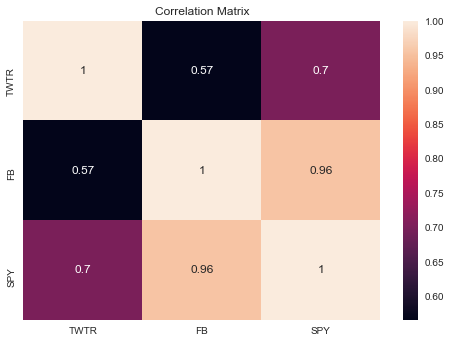

In [291]:
heat_corr = stocks[1:].corr()
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [344]:
"""Calculate the monthly returns"""
returns = stocks.pct_change()
returns.dropna(inplace=True)
returns.head()
print(returns)

                TWTR        FB       SPY
timestamp                               
2015-02-27  0.281108  0.040311  0.056205
2015-03-31  0.041597  0.041092 -0.020080
2015-04-30 -0.222045 -0.041902  0.009834
2015-05-29 -0.058778  0.005332  0.012856
2015-06-30 -0.012272  0.083028 -0.024865
...              ...       ...       ...
2020-12-31  0.164266 -0.013756  0.032647
2021-01-29 -0.066851 -0.054291 -0.010190
2021-02-26  0.525035 -0.002748  0.027806
2021-03-31 -0.174280  0.143273  0.041987
2021-04-30 -0.132170  0.103725  0.052910

[75 rows x 3 columns]


In [372]:
inf = inf_rate.iloc[1:]
ind = log_ind.iloc[2:]
rfree = rfrate.iloc[2:]

In [373]:
inf.index = returns.index
ind.index = returns.index
rfree.index = returns.index

apt_df = pd.concat([returns, inf, ind, rfree], axis=1)
apt_df.columns = ['TWTR', 'FB', 'SPY', 'inf_rate', 'log_ind', 'risk_free']

In [374]:
apt_df

,TWTR,FB,SPY,inf_rate,log_ind,risk_free
timestamp,,,,,,
2015-02-27,0.281108,0.040311,0.056205,0.004887,4.623938,0.020833
2015-03-31,0.041597,0.041092,-0.020080,0.002175,4.617947,0.019167
2015-04-30,-0.222045,-0.041902,0.009834,0.004177,4.613543,0.020000
2015-05-29,-0.058778,0.005332,0.012856,0.003744,4.610220,0.023333
2015-06-30,-0.012272,0.083028,-0.024865,0.000383,4.616932,0.025000
...,...,...,...,...,...,...
2020-12-31,0.164266,-0.013756,0.032647,0.004240,4.599229,0.008333
2021-01-29,-0.066851,-0.054291,-0.010190,0.005315,4.568471,0.005833
2021-02-26,0.525035,-0.002748,0.027806,0.006228,4.596753,0.006667


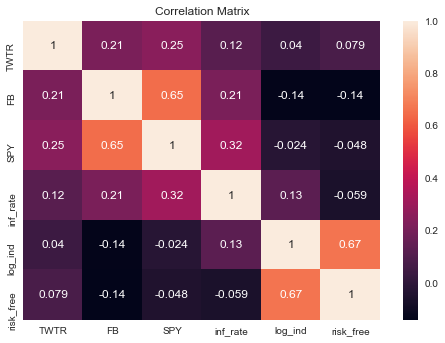

In [380]:
heat_corr = apt_df[1:].corr()
sns.heatmap(heat_corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [390]:
apt_df['excess_twtr']= apt_df[tickers[0]] - apt_df['risk_free']
apt_df['excess_fb']= apt_df[tickers[1]] - apt_df['risk_free']
apt_df['excess_market']= apt_df[tickers[2]] - apt_df['risk_free']

In [391]:
apt_df

,TWTR,FB,SPY,inf_rate,log_ind,risk_free,excess_twtr,excess_fb,excess_market
timestamp,,,,,,,,,
2015-02-27,0.281108,0.040311,0.056205,0.004887,4.623938,0.020833,0.260275,0.019478,0.035371
2015-03-31,0.041597,0.041092,-0.020080,0.002175,4.617947,0.019167,0.022431,0.021925,-0.039246
2015-04-30,-0.222045,-0.041902,0.009834,0.004177,4.613543,0.020000,-0.242045,-0.061902,-0.010166
2015-05-29,-0.058778,0.005332,0.012856,0.003744,4.610220,0.023333,-0.082112,-0.018001,-0.010477
2015-06-30,-0.012272,0.083028,-0.024865,0.000383,4.616932,0.025000,-0.037272,0.058028,-0.049865
...,...,...,...,...,...,...,...,...,...
2020-12-31,0.164266,-0.013756,0.032647,0.004240,4.599229,0.008333,0.155932,-0.022089,0.024313
2021-01-29,-0.066851,-0.054291,-0.010190,0.005315,4.568471,0.005833,-0.072685,-0.060124,-0.016024
2021-02-26,0.525035,-0.002748,0.027806,0.006228,4.596753,0.006667,0.518368,-0.009415,0.021139
